# Application Programming Interface (API) & Natural Language Processing (NLP)

#### Saiful Hasan [GitHub](https://github.com/saifulhasan22) [LinkedIn](https://www.linkedin.com/in/saifulhasan22/)

## Problem Statement

We aim to build a model that would segregate the subreddits based on their title text and would predict which subreddit it is. We have chosen two subreddits - 'movie' and 'music' for our analysis. As a part of this study, we would try different classification models and select the best predictive model. We have chosen to use the classification metric, accuracy score to select the best performing model.

## Table of contents

- [Import Library](#Import-Library)
- [Import Data](#Import-Data)
- [Data Cleaning](#Data-Cleaning)
- [Pre-processing corpus](#Pre-processing-corpus)
- [Model Preparation](#Model-Preparation)
- [Modelling](#Modelling)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Conclusion](#Conclusion)
- [Recommendation](#Recommendation)

##  Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import nltk
from nltk.stem import WordNetLemmatizer #Import lemmatizer
from nltk.tokenize import RegexpTokenizer # Import Tokenizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
RANDOM_STATE = 42

##  Import Data

In [2]:
df_movie = pd.read_csv("../Data/data_movies.csv")

In [3]:
df_music = pd.read_csv("../Data/data_music.csv")

In [4]:
print(df_movie.shape)
print(df_music.shape)

(2723, 9)
(2014, 9)


So, we have 2723 submission for 'movies' subreddit and 2014 for 'music' subreddit for our classification analysis

In [5]:
df = df_movie.append(df_music)  # creating a new dataframe that includes all data

In [6]:
df.shape

(4737, 9)

In [7]:
df[:2]

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Need help to find a name of cyberpunk movie I ...,[removed],movies,1584584017,slvrbat,0,1,True,2020-03-18
1,my coronavirus movie picks,pls comment if you want too add films or categ...,movies,1584584059,Bobatron1010,13,2,True,2020-03-18


##  Data Cleaning 

In [8]:
df.duplicated().sum()  #checking duplicate

0

In [9]:
df[:2]

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Need help to find a name of cyberpunk movie I ...,[removed],movies,1584584017,slvrbat,0,1,True,2020-03-18
1,my coronavirus movie picks,pls comment if you want too add films or categ...,movies,1584584059,Bobatron1010,13,2,True,2020-03-18


In [10]:
#assigning values to target variable 

df['subreddit'] = [1 if i == 'movies' else 0 for i in df['subreddit']]  

In [11]:
#writing function to clean title
#adopted and modified from https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
#adopted and modified from https://towardsdatascience.com/getting-your-text-data-ready-for-your-natural-language-processing-journey-744d52912867
#adopted and modified Matt Brems code  

def review_to_title(title):
    
    # Remove non-letters.
    title = re.sub("[^a-zA-Z]", " ", title)
    
    # Convert to lower case
    title = title.lower()
    
    # Remove hashtags
    title = re.sub(r'#\w*', '', title)
    
    # Remove HTML special entities (e.g. &amp;)
    title = re.sub(r'\&\w*;', '', title)
    
    #punctuation
    title = re.sub(r'[?|!|\'|#]', r'', title)
    
    # Remove hyperlinks
    title = re.sub(r'https?:\/\/.*\/\w*', '', title)
    
    # Remove whitespace (including new line characters)
    title = re.sub(r'\s\s+', ' ', title)
    
    return title 

In [12]:
df['title'] = df['title'].map(review_to_title)  #including the cleaned title in dataframe

In [13]:
df.shape

(4737, 9)

In [14]:
df['title'].isnull().sum()  #checking null values

0

In [15]:
# Lemmatizing
# ref : https://www.guru99.com/stemming-lemmatization-python-nltk.html
# ref : Sarah Scolnik github 

lemmatizer = WordNetLemmatizer()

def lemmatize_words(title):
    words = title.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [16]:
df['title'] = df['title'].apply(lemmatize_words)

##  Pre-processing corpus

### Brief exploration on corpus 

In [17]:
#countvectorizer on whole data 

count_vect = CountVectorizer(
                             analyzer = "word", 
                             stop_words = "english", 
                             max_features = 20,
                             ngram_range= (1,2)
                            )

df_words = count_vect.fit_transform(df['title'])  #fit_transform the vectorizer
df_words = df_words.toarray() #output

In [18]:
print(list(count_vect.get_feature_names())[:15])

['album', 'amp', 'best', 'film', 'good', 'help', 'just', 'know', 'like', 'looking', 'movie', 'music', 'need', 'new', 'song']


In [19]:
covec_df = pd.DataFrame(df_words, columns = count_vect.get_feature_names()) # creating a dataframe

Text(0, 0.5, 'words')

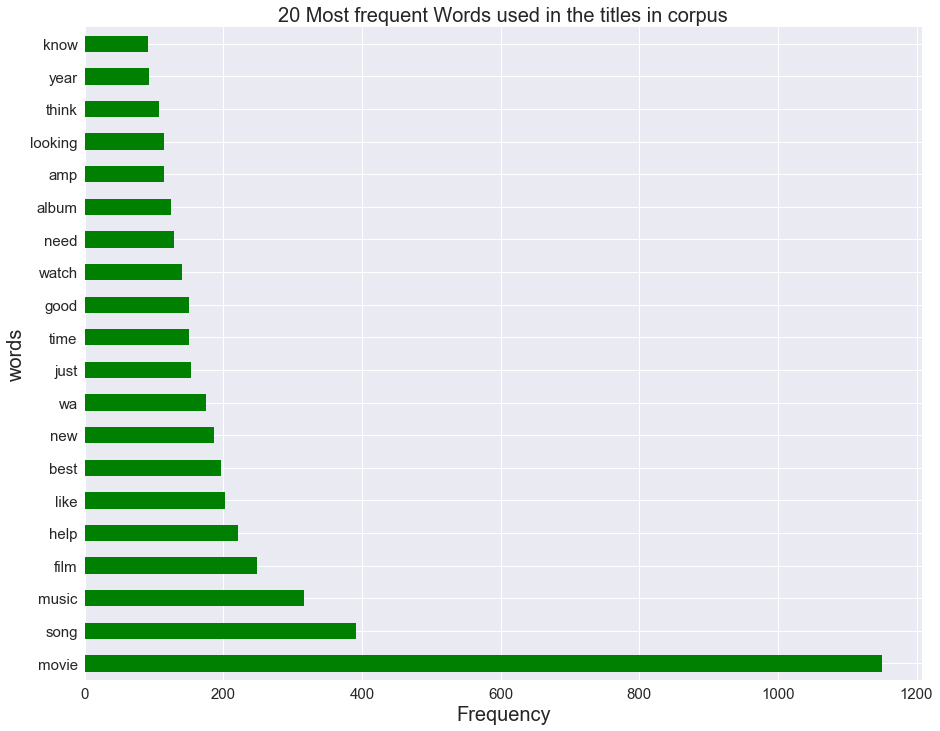

In [20]:
#plotting the most frequent words in the title in corpus

plt.style.use('seaborn')
plt.figure(figsize = (15,12))
covec_df.sum().sort_values(ascending=False).plot(kind = 'barh', color ='g', fontsize = 15)
plt.title("20 Most frequent Words used in the titles in corpus", fontsize = 20)
plt.xlabel('Frequency', fontsize =20)
plt.ylabel ('words', fontsize = 20)

We see that the frequency of word 'movie' is way higher than other words in the whole dataset. 'song' and 'music' are the second and third most frequent words in the dataset. We see that some short forms of words or phrases have been used in the subreddits, e.g. 'amp' for ampifier and 'wa' for what. 

In [21]:
print(len(df['title']))

4737


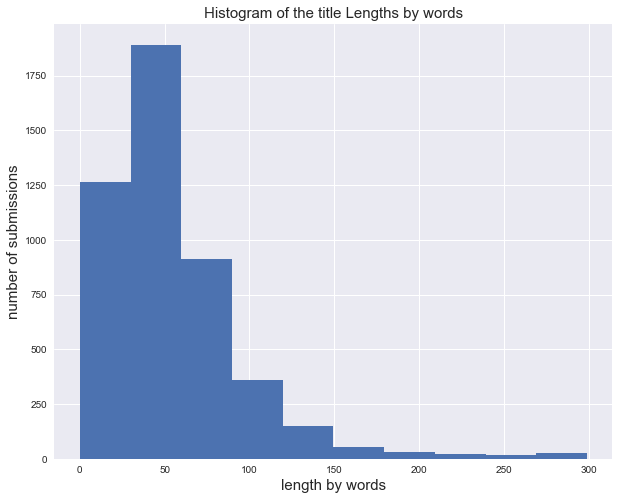

In [22]:
#plotting the length of titles in histogram 

plt.style.use('seaborn')
plt.figure(figsize = (10,8))
lengths_of_posts = [len(each) for each in df['title']]  #adopted code from Noah
plt.hist(lengths_of_posts)
plt.xlabel('length by words', fontsize =15)
plt.ylabel ('number of submissions', fontsize = 15)
plt.title('Histogram of the title Lengths by words', fontsize = 15);

The length of the title is actaully the number of words per title.The Histogram suggets that most of the titles' length are below 150 words, while some titles are lengthy enough to have 200- 300 words.

Text(0.5, 1.0, 'Average score per submission')

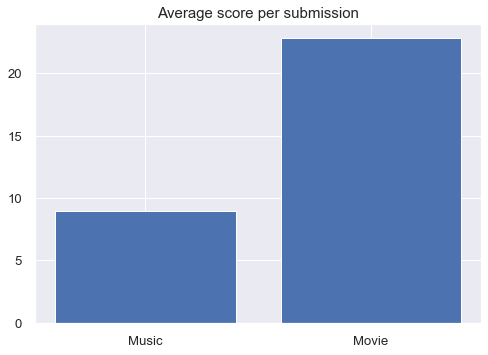

In [84]:
#plotting the average score for 'movie' subreddit and 'music' subreddit
ax_y = df.groupby('subreddit')['score'].mean()
ax_x = ['Music', 'Movie']
plt.bar(ax_x, ax_y)
plt.title('Average score per submission', fontsize = 15)

A submission's score is simply the number of upvotes minus the number of downvotes. So, the 'movies' subreddits's average score is higher than the 'music' subreddit, which might be the result of active participations from 'movies' subreddit users. 

reference: https://www.reddit.com/wiki/faq#wiki_how_is_a_submission.27s_score_determined.3F

### Brief exploration on movies and music dataset individually

### _Counvectorizer_

In [24]:
#most frequent words for movies

count_vect = CountVectorizer(
                             analyzer = "word", 
                             stop_words = "english", 
                             max_features = 20,
                             ngram_range= (1,2)
                            )

vector_input_music = df[df['subreddit'] == 1]['title']  # input for CountVectorizer
movie_words = count_vect.fit_transform(vector_input_music)  #fit_transform the vectorizer
movie_words = movie_words.toarray() #output

In [25]:
print(list(count_vect.get_feature_names()))

['actor', 'best', 'doe', 'endgame', 'film', 'good', 'help', 'just', 'like', 'movie', 'need', 'new', 'scene', 'spoiler', 'think', 'time', 'wa', 'watch', 'watched', 'year']


In [26]:
covec_movie = pd.DataFrame(movie_words, columns = count_vect.get_feature_names())  #creating Dataframe

Text(0, 0.5, 'words')

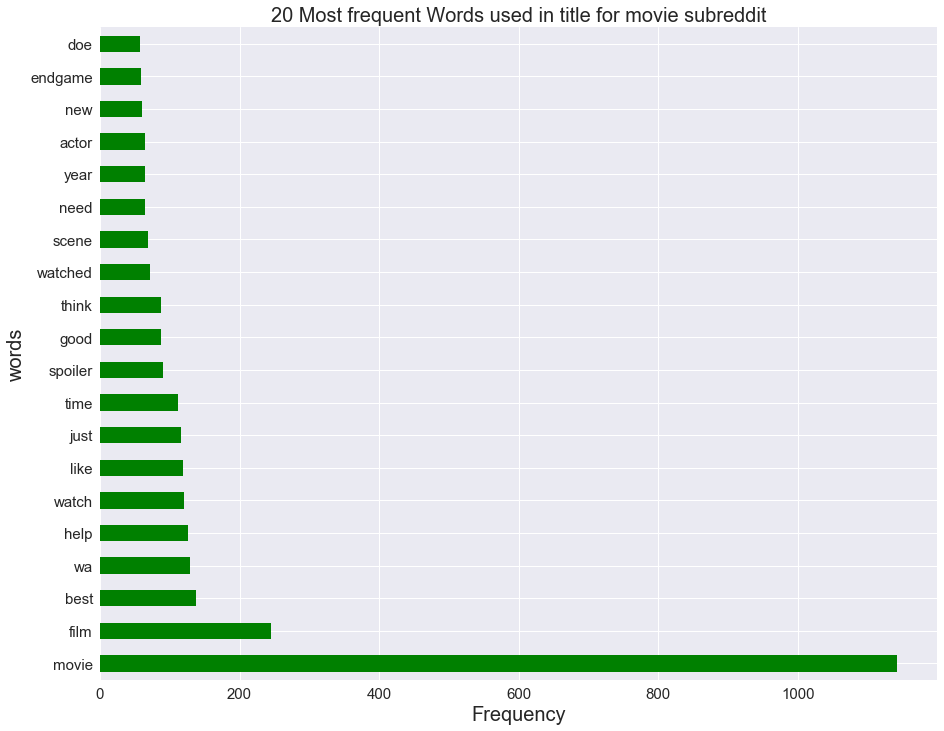

In [27]:
#plotting 20 most frequent words for movie subreddit

plt.style.use('seaborn')
plt.figure(figsize = (15,12))
covec_movie.sum().sort_values(ascending= False).plot(kind = 'barh', color ='g', fontsize = 15)
plt.title("20 Most frequent Words used in title for movie subreddit", fontsize = 20)
plt.xlabel('Frequency', fontsize =20)
plt.ylabel ('words', fontsize = 20)

Not to surprise that words like 'movie', 'film, is the top two most frequent words. there's is also movie names like 'endgame' and short form of words like 'doe' which stands for depend on experience. 

In [28]:
#most frequent words for music

count_vect = CountVectorizer(
                            analyzer = "word", 
                             stop_words = "english", 
                             max_features = 20,
                             ngram_range=(1, 2)
                            ) 

vector_input_music = df[df['subreddit'] == 0]['title'] # input for CountVectorizer

music_words = count_vect.fit_transform(vector_input_music) #fit_transform the vectorizer

music_words = music_words.toarray() #output 

In [29]:
print(list(count_vect.get_feature_names()))

['album', 'amp', 'artist', 'band', 'best', 'cover', 'good', 'help', 'http', 'like', 'looking', 'music', 'need', 'new', 'playlist', 'rock', 'song', 'steelasophical', 'steelband', 'video']


In [30]:
covec_music = pd.DataFrame(music_words, columns = count_vect.get_feature_names()) #creating Dataframe

Text(0, 0.5, 'words')

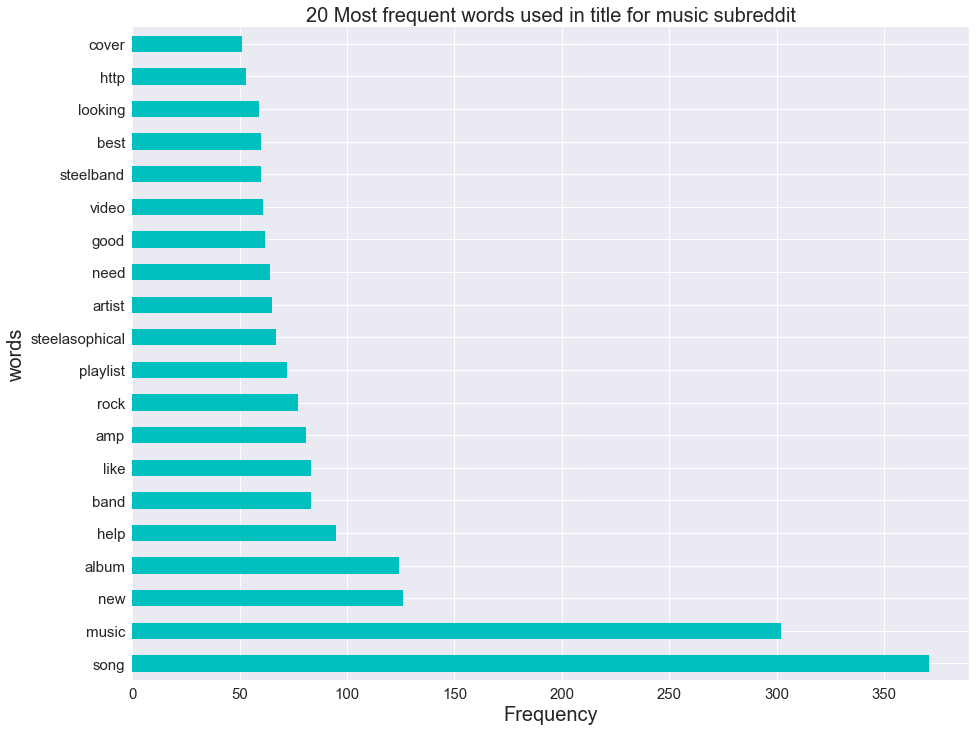

In [31]:
#plotting 20 most frequent words for music subreddit

plt.style.use('seaborn')
plt.figure(figsize = (15,12))
covec_music.sum().sort_values(ascending=False).plot(kind = 'barh', color ='c', fontsize = 15)
plt.title("20 Most frequent words used in title for music subreddit", fontsize = 20)
plt.xlabel('Frequency', fontsize =20)
plt.ylabel ('words', fontsize = 20)

Likewise 'movies' subreddit, not to surprise that we got the words like 'song', 'music', 'album' are the most frequent words. However, we can see that few words are common between the two subreddits, e.g. 'like', 'help', 'best'

### _TF-IDF Vectorizer_

TF-IDF is the short form for “Term Frequency — Inverse Document Frequency”. This is another technique to quantify a word in document. TF-IDF generally compute a weight to each word which signifies the importance of the word in the document and corpus. 

In [32]:
#tfidf vectorizer for movie words

tfdf = TfidfVectorizer(
                     analyzer = "word", 
                     stop_words = 'english', 
                     max_features = 10000, 
                     ngram_range = (1, 2)
                         )

tfdf_input_movie = df[df['subreddit'] == 1]['title']  # input for CountVectorizer

tfdf_movie_words = tfdf.fit_transform(tfdf_input_movie) #fit-transform

tfdf_movie_words = tfdf_movie_words.toarray() #output

tfdf_movie = pd.DataFrame(tfdf_movie_words, columns=tfdf.get_feature_names())  #create Dataframe

tfdf_movie.sum().sort_values(ascending=False).head(10)  

movie      170.736088
film        43.897307
help        40.614416
best        32.627449
watch       27.695621
wa          24.072006
like        23.337639
time        22.249508
good        21.254840
spoiler     20.900867
dtype: float64

In [33]:
#tfidf vectorizer for music words

tfdf = TfidfVectorizer(
                     analyzer = "word", 
                     stop_words = 'english', 
                     max_features = 10000, 
                     ngram_range = (1, 2)
                         )

tfdf_input_music = df[df['subreddit'] == 0]['title']  # input for CountVectorizer

tfdf_music_words = tfdf.fit_transform(tfdf_input_music) #fit-transform

tfdf_music_words = tfdf_music_words.toarray() #output

tfdf_music = pd.DataFrame(tfdf_music_words, columns=tfdf.get_feature_names())  #create Dataframe

tfdf_music.sum().sort_values(ascending=False).head(10)  

song        68.327028
music       49.640428
help        33.010439
album       24.046394
new         23.307100
band        17.784376
looking     17.755175
need        17.753946
playlist    16.433595
genre       16.352990
dtype: float64

##  Model Preparation

In [34]:
#setting X and y(target variable)

X = df['title']
y = df['subreddit']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.40, random_state=RANDOM_STATE)

In [35]:
# writing function for classification metrics

def classification_metric(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel();
    acc = ((tp + tn)/(tp + tn + fp + fn))
    sen = (tp /(tp+fn))
    spec = (tn/(tn+fp))
    pre = (tp/(tp+fp))
    clas = 1 -acc
    print('Classification metric:')
    print("accuracy:               {:.4f} ".format(((tp + tn)/(tp + tn + fp + fn))))
    #print("missclassification:     {:.4f} ".format(1 - ((tp + tn)/(tp + tn + fp + fn))))
   # print("sensitivity:            {:.4f}".format((tp /(tp+fn))))
   # print("specificity:            {:.4f} ".format((tn/(tn+fp))))
    #print("precise:                {:.4f} ".format((tp/(tp+fp))))

##  Modelling 

### Baseline Model

For classification, there is no mean to predict, so a baseline classification model simply predicts the most frequently occurring class.

In [36]:
print('Best baseline accuracy on TRAIN set:', y_train.value_counts(normalize=True).max())
print('Best baseline accuracy on TEST set:', y_test.value_counts(normalize=True).max())

Best baseline accuracy on TRAIN set: 0.5749472202674173
Best baseline accuracy on TEST set: 0.5746701846965699


The accuracy score for both train set and test set is close enough. However, the accuracy of around 57% is the not satisfactory. We will try few models below to see if we can improve the accuracy

### CVEC + Logistic Regression

In [37]:
# Instantiate pipeline.
pipe_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('logit', LogisticRegression(solver = 'lbfgs'))
])

#Params-dictionary
params_grid = {
    'cv__max_features': [1000, 1500],
    'cv__stop_words': ['english'],
    'cv__ngram_range': [(1,1), (1,2)],
    'logit__class_weight': ['balanced', 'distance'],
    'logit__penalty': ['l2'],
    'logit__C': [.001, 0.01, 0.1, 1]
}

# GridSearch over pipeline with given grid of parameters.
logit_cv = GridSearchCV(pipe_cv, 
                     params_grid, 
                     cv=5, 
                     scoring ='accuracy')

# Fit model.
logit_cv.fit(X_train, y_train);

In [38]:
logit_cv.best_params_

{'cv__max_features': 1500,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': 'english',
 'logit__C': 1,
 'logit__class_weight': 'balanced',
 'logit__penalty': 'l2'}

In [39]:
logit_cv.best_estimator_ ;

In [40]:
print('Best TRAIN set accuracy: {:.4f}'.format(logit_cv.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(logit_cv.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(logit_cv.best_score_))

Best TRAIN set accuracy: 0.9469
Best TEST set accuracy: 0.8749
Cross-val accuracy: 0.8730


In [41]:
# return classification metric
classification_metric(y_test, logit_cv.predict(X_test))

Classification metric:
accuracy:               0.8749 


We see a improvement in the accuracy score. There is somewhat difference between accuracy on test set and train set.

### TF-IDF + Logistic Regression

In [42]:
# Instantiate pipeline.
pipe_tf = Pipeline(steps =[
    ('tf', TfidfVectorizer()),
    ('logit', LogisticRegression())
])

#Params-dictionary
params_grid = {
    'tf__max_features': [1000, 1500],
    'tf__stop_words': ['english'],
    'tf__ngram_range': [(1,1), (1,2)],
     'logit__penalty': ['l2'],
    'logit__C': [.001, 0.01, 0.1, 1],
     'logit__class_weight': ['balanced', 'distance'],
    'logit__verbose': [0]
}

# GridSearch over pipeline with given grid of parameters.
logit_tf = GridSearchCV(pipe_tf, params_grid, cv=5)

# Fit model.
logit_tf.fit(X_train, y_train);

In [43]:
logit_cv.best_params_

{'cv__max_features': 1500,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': 'english',
 'logit__C': 1,
 'logit__class_weight': 'balanced',
 'logit__penalty': 'l2'}

In [44]:
logit_cv.best_estimator_ ;

In [45]:
print('Best TRAIN set accuracy: {:.4f}'.format(logit_tf.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(logit_tf.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(logit_tf.best_score_))

Best TRAIN set accuracy: 0.9469
Best TEST set accuracy: 0.8839
Cross-val accuracy: 0.8811


The accuracy score has been improved by TD-IDF with  Logistic model. The difference between accuracy on train and test set has shrinked a bit as well. 

### CVEC + KNN

In [46]:
pipe_cv = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

#Params-dictionary
pipe_params = { 'cv__max_features': [1000, 1500],
                 'cv__stop_words': ['english'],
                 'cv__ngram_range': [(1,1), (1,2)],
                 'knn__metric': ['minkowski','euclidean', 'manhattan'],
                'knn__n_neighbors': [3, 5],
                 'knn__weights': ['uniform', 'distance']}

knn_cv = GridSearchCV(pipe_cv, 
                    pipe_params, 
                    cv = 5)
# Fit model.
knn_cv.fit(X_train, y_train);

In [47]:
knn_cv.best_estimator_ ;

In [48]:
print('Best TRAIN set accuracy: {:.4f}'.format(knn_cv.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(knn_cv.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(knn_cv.best_score_))

Best TRAIN set accuracy: 0.9609
Best TEST set accuracy: 0.8069
Cross-val accuracy: 0.8170


The accuracy score has drop for CVEC + KNN model than the logistic models (both with CEVC with and TF-IDF with). The differences between score for train and test has widened as well.

## TF-IDF + KNN

In [49]:
pipe_tf = Pipeline(steps=[
    ('tfdf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

#Params-dictionary
pipe_params = { 'tfdf__max_features': [1000, 1500],
                 'tfdf__stop_words': [{'english'}],
                 'tfdf__ngram_range': [(1,1), (1,2)],
                 'knn__metric': ['minkowski','euclidean', 'manhattan'],
                 'knn__n_neighbors': [3, 5],
                  'knn__weights': ['uniform', 'distance']}

knn_tf = GridSearchCV(pipe_tf, 
                    pipe_params, 
                    cv = 5) 
# Fit model                        
knn_tf.fit(X_train, y_train);

In [50]:
knn_tf.best_estimator_ ;

In [51]:
print('Best TRAIN set accuracy: {:.4f}'.format(knn_tf.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(knn_tf.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(knn_tf.best_score_))

Best TRAIN set accuracy: 0.9778
Best TEST set accuracy: 0.7261
Cross-val accuracy: 0.7157


The accuracy score has drop further for TF-IDF + KNN model. The differences between score for train and test has widened as well suggesting overfit model. The accuracy score is not that up to satisfcatory level.

### CVEC + Naive bayes (Multinomial)

In [52]:
pipe_cv = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('multNB', MultinomialNB())
])

#Params-dictionary
pipe_params = { 'cv__max_features': [1000, 1500],
                 'cv__stop_words': [{'english'}],
                 'cv__ngram_range': [(1,1), (1,2)],
                  'multNB__alpha':  [2],
                   'multNB__fit_prior': [True],
                  'multNB__class_prior': [None]}

gs_multNB = GridSearchCV(pipe_cv, 
                    pipe_params, 
                    cv = 5) 
# Fit model                              
gs_multNB.fit(X_train, y_train);

In [53]:
gs_multNB.best_estimator_ ;

In [54]:
gs_multNB.get_params ;

In [55]:
print('Best TRAIN set accuracy: {:.4f}'.format(gs_multNB.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(gs_multNB.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(gs_multNB.best_score_))

Best TRAIN set accuracy: 0.9152
Best TEST set accuracy: 0.8802
Cross-val accuracy: 0.8712


The accuracy has jumped to 88% which is close to our TF-IDF + Logistic model. 

### TD-IDF + Naive bayes (Gaussian )

In [56]:
# adapted from https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [57]:

pipe_tf = Pipeline(steps=[
    ('tfdf', TfidfVectorizer()),
    ("_",DenseTransformer()),
    ('gasNB', GaussianNB())
])

#Params-dictionary
pipe_params = { 'tfdf__max_features': [1000, 1500],
                 'tfdf__stop_words': [{'english'}],
                 'tfdf__ngram_range': [(1,1), (1,2)],
                  'gasNB__var_smoothing': [1e-8]}
            
gs_gasNB = GridSearchCV(pipe_tf, 
                    pipe_params, 
                    cv = 5) 


# Fit model
gs_gasNB.fit(X_train, y_train);

In [58]:
gs_gasNB.best_estimator_ ;

In [59]:
print('Best TRAIN set accuracy: {:.4f}'.format(gs_gasNB.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(gs_gasNB.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(gs_gasNB.best_score_))

Best TRAIN set accuracy: 0.8642
Best TEST set accuracy: 0.7683
Cross-val accuracy: 0.7713


We can se that Naive Bayes (Multinomial) performs better than Naive Bayes (Gaussian) in terms of accuracy. So far TF-IDF is has most accuracy score. We will try few other classification models to see if we can improve the accuracy score even further.

### CVEC + Decision Tree

In [60]:
# Simple pipeline - list of tuples
cvec_tree_pipe = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('tree', DecisionTreeClassifier())
])

#Params-dictionary
cvec_tree_params = {'cv__max_features': [1000, 1500],
                 'cv__stop_words': [{'english'}],
                 'cv__ngram_range': [(1,1), (1,2)],
                    'cv__min_df': [5],
                    'cv__max_df': [.5,.1,.2],
                 'tree__max_depth': [10,15,20],
                 'tree__min_samples_leaf': [2],
                  'tree__min_samples_split': [3]}

gs_tree = GridSearchCV(cvec_tree_pipe, 
                    cvec_tree_params, 
                    cv = 5) 
# Fit model                         
gs_tree.fit(X_train, y_train);

In [61]:
gs_tree.best_estimator_ ;

In [62]:
print('Best TRAIN set accuracy: {:.4f}'.format(gs_tree.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(gs_tree.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(gs_tree.best_score_))

Best TRAIN set accuracy: 0.8061
Best TEST set accuracy: 0.7752
Cross-val accuracy: 0.7847


The scores suggest that above CART model is an slightly overfit model (accuracy on train set is slightly higher than the accuracy on test set). The difference is not that much. Moreover, the accuracy on test set is lower than the 80%. We already have model with aroun 88% accuracy. So, we will try further to see if any kind of improvment can be achieved. Therefore, we should try bagging classification model.

### CVCE + Bagging Classifier

In [63]:
# Simple pipeline - list of tuples
cvec_bagg_pipe = Pipeline(steps=[
    ('cvec', CountVectorizer()),
    ('bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier()))
])

#Params-dictionary
cvec_bagg_params = { 'cvec__max_features': [1000, 1500],
                 'cvec__stop_words': [{'english'}],
                    'cvec__min_df': [5],
                    'cvec__max_df': [.5],
                 'cvec__ngram_range': [(1,1), (1,2)],
                 'bagg__n_estimators': [2, 5, 10], 
                  'bagg__max_samples': [.001, .1, .5, 1]
                    }             

gs_bagg = GridSearchCV(cvec_bagg_pipe, 
                    cvec_bagg_params,
                      cv= 5) 

# Fit model                          
gs_bagg.fit(X_train, y_train);

In [64]:
 gs_bagg.best_estimator_ ;

In [65]:
print('Best TRAIN set accuracy: {:.4f}'.format(gs_bagg.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(gs_bagg.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(gs_bagg.best_score_))

Best TRAIN set accuracy: 0.9437
Best TEST set accuracy: 0.8364
Cross-val accuracy: 0.8367


The accuracy score has improved compared to CART model accuracy score. however, still below our best accuracy score 88%.

### CVCE + Randomforest

In [66]:
# Simple pipeline - list of tuples
cvec_rf_pipe = Pipeline(steps=[
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

#Params-dictionary
cvec_rf_params = { 'cvec__max_features': [1000, 1500],
                 'cvec__stop_words': [{'english'}],
                    'cvec__min_df': [5],
                    'cvec__max_df': [.5],
                 'cvec__ngram_range': [(1,1), (1,2)],
                 'rf__max_depth': [2, 5, 10], 
                 'rf__min_samples_leaf': [1],
                  'rf__min_samples_split': [3]
                    }             

gs_rf = GridSearchCV(cvec_rf_pipe, 
                    cvec_rf_params,
                      cv= 5) 

# Fit model                            
gs_rf.fit(X_train, y_train);

In [67]:
gs_rf.best_estimator_ ;

In [68]:
print('Best TRAIN set accuracy: {:.4f}'.format(gs_rf.score(X_train, y_train)))
print('Best TEST set accuracy: {:.4f}'.format(gs_rf.score(X_test, y_test)))
print('Cross-val accuracy: {:.4f}'.format(gs_rf.best_score_))

Best TRAIN set accuracy: 0.8135
Best TEST set accuracy: 0.7868
Cross-val accuracy: 0.8026


The accuracy has fallen further than Bagging Classifier model. So, couldn't improve the accuracy score than Bagging model.

## Model Selection

We have chosen __accuracy score__ as a matric to select our model. Accuracy score refers to the percentage of observations the model predicts correctly. 

In [69]:
print('Accuracy score for Baseline model on train set:{:.4f}'.format(y_train.value_counts(normalize=True).max()))
print('Accuracy score for Baseline model on test set: {:.4f}'.format(y_test.value_counts(normalize=True).max()))
print()
print('Accuracy score for CVCE + Logistic Regression on train set: {:.4f}'.format(logit_cv.score(X_train, y_train)))
print('Accuracy score for CVCE + Logistic Regression on test set: {:.4f}'.format(logit_cv.score(X_test, y_test)))
print()
print('Accuracy score for TF-IDF + Logistic Regression on train set: {:.4f}'.format(logit_tf.score(X_train, y_train)))
print('Accuracy score for TF-IDF + Logistic Regression on test set: {:.4f}'.format(logit_tf.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + KNN on train set: {:.4f}'.format(knn_cv.score(X_train, y_train)))
print('Accuracy score for CVEC + KNN on test set: {:.4f}'.format(knn_cv.score(X_test, y_test)))
print()
print('Accuracy score for TF-IDF + KNN on train set: {:.4f}'.format(knn_tf.score(X_train, y_train)))
print('Accuracy score for TF-IDF + KNN on test set: {:.4f}'.format(knn_tf.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + Multinomial on train set: {:.4f}'.format(gs_multNB.score(X_train, y_train)))
print('Accuracy score for CVEC + Multinomial on test set: {:.4f}'.format(gs_multNB.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + Gaussaian on train set: {:.4f}'.format(gs_gasNB.score(X_train, y_train)))
print('Accuracy score for CVEC + Gaussaian on test set: {:.4f}'.format(gs_gasNB.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + Decision Tree on train set: {:.4f}'.format(gs_tree.score(X_train, y_train)))
print('Accuracy score for CVEC + Decision Tree on test set: {:.4f}'.format(gs_tree.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + Bagging Classification on train set: {:.4f}'.format(gs_bagg.score(X_train, y_train)))
print('Accuracy score for CVEC + Bagging Classification on test set: {:.4f}'.format(gs_bagg.score(X_test, y_test)))
print()
print('Accuracy score for CVEC + Random Forest on train set: {:.4f}'.format(gs_rf.score(X_train, y_train)))
print('Accuracy score for CVEC + Random forest on test set: {:.4f}'.format(gs_rf.score(X_test, y_test)))

Accuracy score for Baseline model on train set:0.5749
Accuracy score for Baseline model on test set: 0.5747

Accuracy score for CVCE + Logistic Regression on train set: 0.9469
Accuracy score for CVCE + Logistic Regression on test set: 0.8749

Accuracy score for TF-IDF + Logistic Regression on train set: 0.9469
Accuracy score for TF-IDF + Logistic Regression on test set: 0.8839

Accuracy score for CVEC + KNN on train set: 0.9609
Accuracy score for CVEC + KNN on test set: 0.8069

Accuracy score for TF-IDF + KNN on train set: 0.9778
Accuracy score for TF-IDF + KNN on test set: 0.7261

Accuracy score for CVEC + Multinomial on train set: 0.9152
Accuracy score for CVEC + Multinomial on test set: 0.8802

Accuracy score for CVEC + Gaussaian on train set: 0.8642
Accuracy score for CVEC + Gaussaian on test set: 0.7683

Accuracy score for CVEC + Decision Tree on train set: 0.8061
Accuracy score for CVEC + Decision Tree on test set: 0.7752

Accuracy score for CVEC + Bagging Classification on train

The findings suggest that only four model has above 80% accuracy score - CVEC+Logistic, IF-IDF + Logistic, CVEC + KNN, CVEC+Multinomial, CVEC + Bagging Classification model.

The accuracy scores on test sets for CVEC + Multinomial and TF-IDF with a logistic Regression model are very close. However, the difference (0.8839 - 0.8802) suggests that TF-IDF + Logistic regression has slightly better accuracy. 
Thus, we can conclude that TF-IDF + Logistic regression model has the highest accuracy score on test dataset. in effect, it suggests that __TF-IDF with a logistic Regression model__ performs better than any other model. With an __accuracy of 88.39%__, it also outperforms Baseline model. The accuracy score on train set is slightly higher than accuracy score on test set, however the difference is acceptable to qualify as a good model


Logistic regression is by far one of the most common classification algorithm. Logistic regression model is great at binary classifications and has interpretable coefficient. In our study the target variable is binary, if y = 1 it's movie subreddit and if y = 0 its music subreddit.

Below we will evaluate the TF-IDF with logistic Regression model using confusion matrix and coefficient interpretation.

## Model Evaluation

In [70]:
#function for confusion matrix plotting
#Code adopted from Mahdi Shadkam-Farrokhi

def confusion_matrix_plot(y_test, y_pred):
    # handling data
    cm = confusion_matrix(y_test, y_pred)
    labels = y_test.unique()
    labels.sort()
    
    # plotting
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=labels, yticklabels=labels, annot_kws={"size": 20})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

Our chosen metric accuracy takes into account all true predictions, both true positives and true negatives. The equation is as below:

$$
Accuracy = \frac{All\ Correct}{All\ Predictions}
$$

$$
= \frac{(TP + TN)} {(TP + FP + TN + FN)}
$$


The cosufion matric for our TF-IDF with a logistic Regression model is provided below:

In [71]:
#confusion matrix calculation

confusion_matrix(y_test, logit_tf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(y_test,logit_tf.predict(X_test)).ravel()
print("True Negatives: ", tn)
print()
print("False Positives: ", fp)
print()
print("False Negatives: ", fn)
print()
print("True Positives: ", tp)

True Negatives:  718

False Positives:  88

False Negatives:  132

True Positives:  957


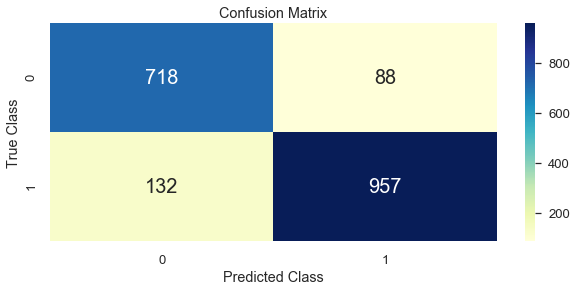

In [72]:
confusion_matrix_plot(y_test, logit_tf.predict(X_test))

We can see that our selected model has more False Negatives than False Positives. 132 False negative score suggests that our model predicted 132 observations as music subreddits while they were actually movie subreddits. on the other hand, False Positive scores suggests that our model predicted 88 models as movie subreddits while they were actually music subreddits. the above equation suggests that to improve the model performance, our model would need to convert this false prediction to true predictions. In other word, to maximize the accuracy our model needs to minimize the false negatives and false positives. On the other side, True negatives and True Positives are the predictions model did accurately. for instance, 718 true negative means model has predicted 718 observation correctly as music subreddits, while 957 true positives mean model has predicted 957 observation correctly as movies subreddits. Minimizing the false predictions would eventually maximize the true predictions

As the model has accuracy score of 88.39%, it suggests that the misclassification rate is 11.61%. it is a measurement of what percentage of observations did the model incorrectly predict. If we review the most frequent words for both subreddits, we observe that there are few words that are common for both subreddits such as 'help' 'like' 'best'. So, it suggests that due to the presence of common words in two subreddits, our model misclassified few observations.  

In [73]:
#Coefficient 
Coefficient_list = pd.DataFrame(data=logit_tf.best_estimator_.steps[1][1].coef_[0],index=logit_tf.best_estimator_.steps[0][1].get_feature_names())  #create daatframe
Coefficient_list.columns = ['coefficient']
Coefficient_list['coefficient'].sort_values(ascending = False)[:10]  #show top 10 features for interpretation

movie       8.860043
film        4.503210
spoiler     2.298160
actor       2.277341
watched     2.196136
endgame     1.640633
trailer     1.613416
scene       1.587468
director    1.573640
cinema      1.555622
Name: coefficient, dtype: float64

In [74]:
#show last 10 features for interpretation
Coefficient_list['coefficient'].sort_values(ascending = False)[-10:] 

amp        -1.616551
ft         -1.668388
pop        -1.711179
artist     -2.168500
playlist   -2.415825
band       -2.813180
rock       -2.843071
album      -3.793030
song       -4.995121
music      -5.070868
Name: coefficient, dtype: float64

The coefficient refers to the relationship between predictors and target variables. Our target variable is the subreddit type - weather it is a movie subreddit or a music subreddit.


The coefficient for 'movie' words is 4.064 which refers that for a unit increase of the presence of word 'movie' in title, an observation is $e^{\beta_1} = e^{9.55} = 14045$ TIMES AS LIKELY to be a movie subreddit. So basically as the word 'movie' occurrence increases by one unit in the title, an observation is 14045 TIMES AS LIKELY to be a movie subreddit. On the other hand, The coefficient for 'song' words is -5.769 which refers that for a unit increase of the presence of word 'song' in title, an observation is $(e^{\beta_1}-1) x 100 = (e^{-5.769} -1) x 100 = 99.7$ percent LESS LIKELY to be a movie subreddit.


## Conclusion

Based on the analysis results we see that TF-IDF with a logistic Regression model performs better than other model. We have chosen accuracy score to select the best model. TF-IDF with a logistic Regression model has the highest accuracy score, which means that comparatively this model can predict highest percentage of observations correctly. The accuracy score for the selected model is above 88% on test dataset. Therefore, based on the analysis we did, we can expect that TF-IDF with a logistic Regression model can be useful technique to detect which blog post is about movies and which is about music just analysing the title of the post.  

## Recommendation

From the findings of the TF-IDF with a logistic Regression model I have come to these recommendations:

1. Our model delivers expected results with 88% accuracy to segregate posts from 'movie' subreddit and 'music' subreddit.
1. For maximizing accuracy score we need to minimize the false negative and false positive scores.
2. To improve the accuracy score we need try to train the model with more data and tuining more hyparameters.